In [1]:
import sqlite3

# create a new database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# create a simple sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# sample data
data = [
    ("Shirt", 10, 500),
    ("Shirt", 5, 500),
    ("Shoes", 3, 1500),
    ("Shoes", 2, 1500),
    ("Bag", 8, 700)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()
conn.close()

print("Database created successfully!")


Database created successfully!


In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

conn.close()

df

,product,total_qty,revenue
0,Bag,8,5600.0
1,Shirt,15,7500.0
2,Shoes,5,7500.0


In [3]:
print("SALES SUMMARY\n")
print(df)

SALES SUMMARY

  product  total_qty  revenue
0     Bag          8   5600.0
1   Shirt         15   7500.0
2   Shoes          5   7500.0


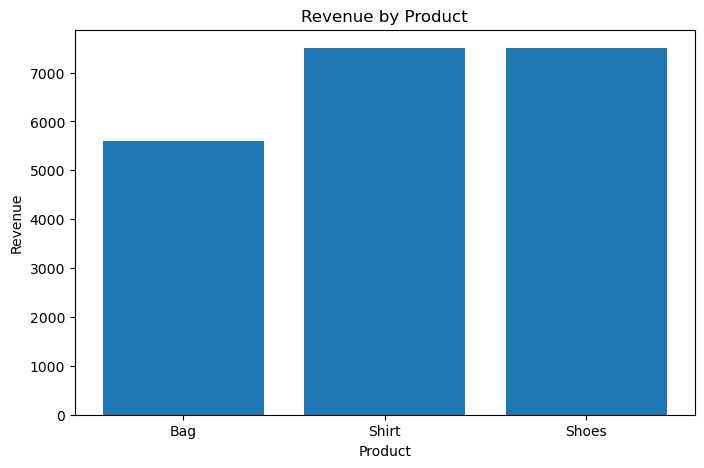

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df["product"], df["revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.show()

In [5]:
print("\n===== SALES ANALYSIS REPORT =====\n")

total_rev = df["revenue"].sum()
total_qty = df["total_qty"].sum()
top_product = df.loc[df['revenue'].idxmax()]

print(f"Total Revenue: ₹{total_rev}")
print(f"Total Quantity Sold: {total_qty}\n")

print(f" Top Selling Product: {top_product['product']} (₹{top_product['revenue']})")
print("\nDetailed Summary:\n")
print(df)
print("\n==================================")


===== SALES ANALYSIS REPORT =====

Total Revenue: ₹20600.0
Total Quantity Sold: 28

 Top Selling Product: Shirt (₹7500.0)

Detailed Summary:

  product  total_qty  revenue
0     Bag          8   5600.0
1   Shirt         15   7500.0
2   Shoes          5   7500.0



In [7]:
threshold = 5000 
low_sales = df[df["revenue"] < threshold]

print(" LOW PERFORMING PRODUCTS \n")
if low_sales.empty:
    print("All products are performing well!")
else:
    print(low_sales)

 LOW PERFORMING PRODUCTS 

All products are performing well!


In [8]:
plt.savefig("sales_chart.png")
print("Chart saved!")

Chart saved!


<Figure size 640x480 with 0 Axes>

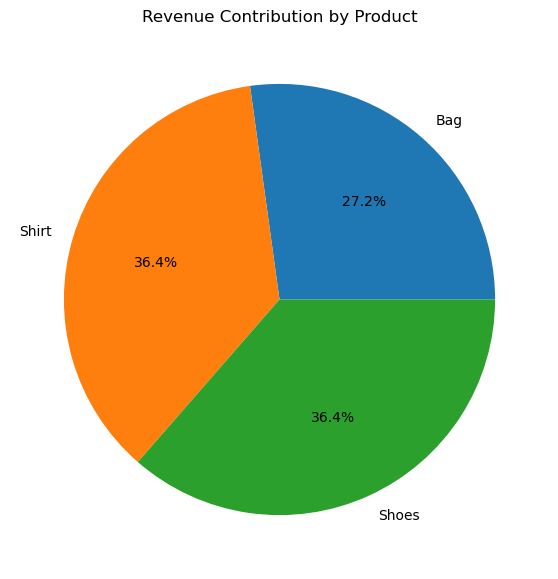

In [9]:
plt.figure(figsize=(7,7))
plt.pie(df["revenue"], labels=df["product"], autopct="%1.1f%%")
plt.title("Revenue Contribution by Product")
plt.show()